 # Apprentissage non supervisé : Segmentation 

In [1]:
import numpy as np  
import seaborn as sns
from sklearn.datasets import make_blobs
from scipy.spatial import distance

> L 'objectif est de :
> 1. Intertie totale de dataset 
> 2. Creer une liste de groupes
> 3. L'inerie intra classe
> 4. L'inertie inter classe
> 5. L'inertie totale = inertie intra classe + inertie inter classe
> 6. Refaire le calcule sur le dataset avec différents centres [[0,0],[1,1]]
> 7. Comparer les résultats obtenus

In [2]:
# Initialisation des données
centres = [[1,2],[7,8]]
data,label = make_blobs(n_samples=10, centers=centres,random_state=0)

<AxesSubplot: >

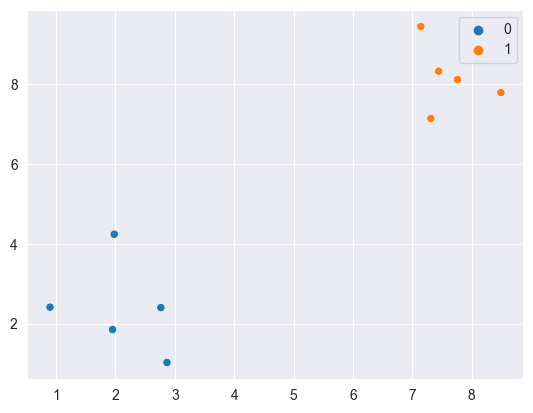

In [3]:
sns.scatterplot(
    x=[x[0] for x in data],
    y=[x[1] for x in data],
    hue=label
)

## 1. Intertie totale de dataset

In [4]:
def inertie_totale(data):
    g=np.mean(data,axis=0)
    total = 0
    for i in range(len(data)):
        total += distance.euclidean(data[i], g)**2
    total/=len(data)
    return total


In [5]:
inertie_totale(data)

17.25083494595461

## 2. Creer une liste de groupes

In [6]:
def groupe(data):
    groupe_0=[]
    groupe_1=[]
    for i in range(len(data)):
        if label[i]==0 :
            groupe_0.append(data[i])
        else :
            groupe_1.append(data[i])
    return groupe_0,groupe_1

In [7]:
def regroupement(data,labels):
    liste=[[] for _ in range(len(np.unique(labels)))]
    for i in range(data.shape[0]):
        liste[labels[i]].append(data[i])
    return liste

In [8]:
cluster=regroupement(data,label)

In [9]:
cluster

[[array([1.97873798, 4.2408932 ]),
  array([1.95008842, 1.84864279]),
  array([0.89678115, 2.4105985 ]),
  array([2.86755799, 1.02272212]),
  array([2.76405235, 2.40015721])],
 [array([8.49407907, 7.79484174]),
  array([7.14404357, 9.45427351]),
  array([7.76103773, 8.12167502]),
  array([7.44386323, 8.33367433]),
  array([7.3130677 , 7.14590426])]]

In [10]:
grp0,grp1=groupe(data)

<AxesSubplot: >

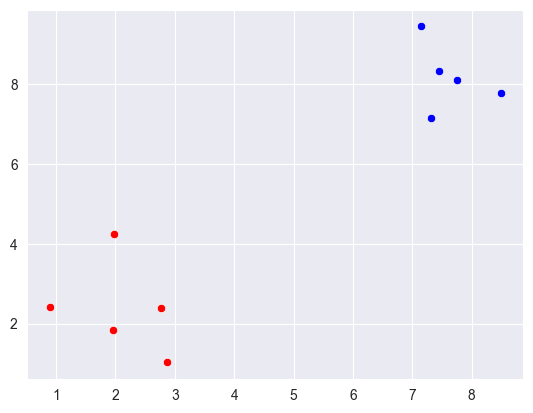

In [11]:
sns.scatterplot(
    x=[x[0] for x in grp0],
    y=[x[1] for x in grp0],
    color='red'
)
sns.scatterplot(
    x=[x[0] for x in grp1],
    y=[x[1] for x in grp1],
    color='blue'
)

## 3. L'inerie intra classe

In [12]:
def inertie_intra_classe(cluster) :
    return inertie_totale(cluster[0])+inertie_totale(cluster[1])

In [13]:
def intra_class(cluster):
    i=0
    for cl in cluster:
        ic=0
        for x in cl:
            ic+=distance.euclidean(x,np.mean(cl,axis=0))**2
        i=i+ic/len(cl)
    return i/len(cluster)

In [20]:
intra_class(cluster)

1.2106403714915754

In [14]:
inertie_intra_classe(cluster)

2.421280742983151

## 4. Inertie Inter classe

In [15]:
def inertie_inter_classe(groupes,data):
    g=np.mean(data,axis=0)
    total = 0
    for i in range(len(groupes)):
        nc=len(groupes[i])
        c=np.mean(groupes[i],axis=0)
        de=distance.euclidean(c,g)**2
        total+=nc*de
    return total/len(data)
    

In [16]:
inertie_inter_classe(cluster,data)

16.040194574463037

In [21]:
def inertie_total(groupes,data):
    IntraClass=intra_class(groupes)
    InterClass=inertie_inter_classe(groupes,data)
    return IntraClass+InterClass

In [22]:
inertie_total(cluster,data)

17.25083494595461

In [23]:
#test
inertie_total(cluster,data)

17.25083494595461

# K means

## 1. Initialisation des données

In [73]:
iris = sns.load_dataset('iris')

In [25]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
iris.drop('species',axis=1,inplace=True)

In [27]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 2. Définition des fonction utiles

In [35]:
# Initialisation des centres
def init_centres(data,k):
    return data[np.random.choice(data.shape[0],k,replace=False)]

In [36]:
data_c=init_centres(iris.values,3)

In [37]:
data_c

array([[5. , 2. , 3.5, 1. ],
       [5.5, 2.5, 4. , 1.3],
       [5. , 3.4, 1.6, 0.4]])

In [38]:
# initilasation 
def update_centres(data,centres):
    new_centres=[]
    for i in range(len(centres)):
        new_centres.append(np.mean(data[i],axis=0))
    return new_centres

In [70]:
def affectation(data,centres):
    labels=[]
    for i in range(len(data)):
        dist=[]
        for c in centres:
            dist.append(distance.euclidean(data[i],c))
        labels.append(np.argmin(dist))
    return labels

In [71]:
# Kmeans 
def kmeans(data, Nmax):
    #For iris
    data.drop('species',axis=1)
    centres=init_centres(data.values,3)
    for i in range(Nmax):
        labels=affectation(data.values,centres)
        cluster=regroupement(data.values,labels)
        centres=update_centres(cluster,centres)
    return centres,labels

In [74]:
centres,labels=kmeans(iris,100)

<AxesSubplot: >

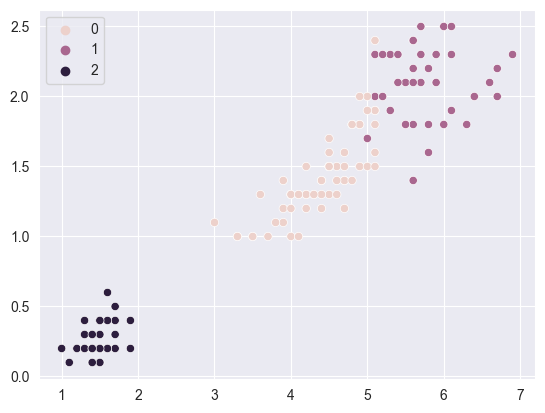

In [77]:
#
sns.scatterplot(
    x=[x[2] for x in iris.values],
    y=[x[3] for x in iris.values],
    hue=labels
)

In [78]:

sns.scatterplot(
    x=[x[2] for x in iris.values],
    y=[x[3] for x in iris.values],
    hue=iris['species']
)

KeyError: 'species'